In [1]:
import pandas
import numpy
raw = pandas.DataFrame.from_csv('P+N_DATA.csv')
train=raw.transpose()
train=raw.transpose()
for col in train.columns.values:
    for i in train.index.values:
        if(train[col][i]>0):
            train.set_value(i,col,1)
X=train.iloc[0:262, 0:4346]
Y=train['YCOMPLETE']

In [5]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

f1_score_list=[]
f1_score_list_train=[]
for size in numpy.arange(0.1,0.75,0.01):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size, random_state=42)
    clf = BernoulliNB()
    clf = clf.fit(X_train, y_train)
    predictions=numpy.array(clf.predict(X_test))
    f1_score_list.append(f1_score(y_test,predictions))
    predictions_train=numpy.array(clf.predict(X_train))
    f1_score_list_train.append(f1_score(y_train,predictions_train))

Populating the interactive namespace from numpy and matplotlib


C:\Users\rub account\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['size', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


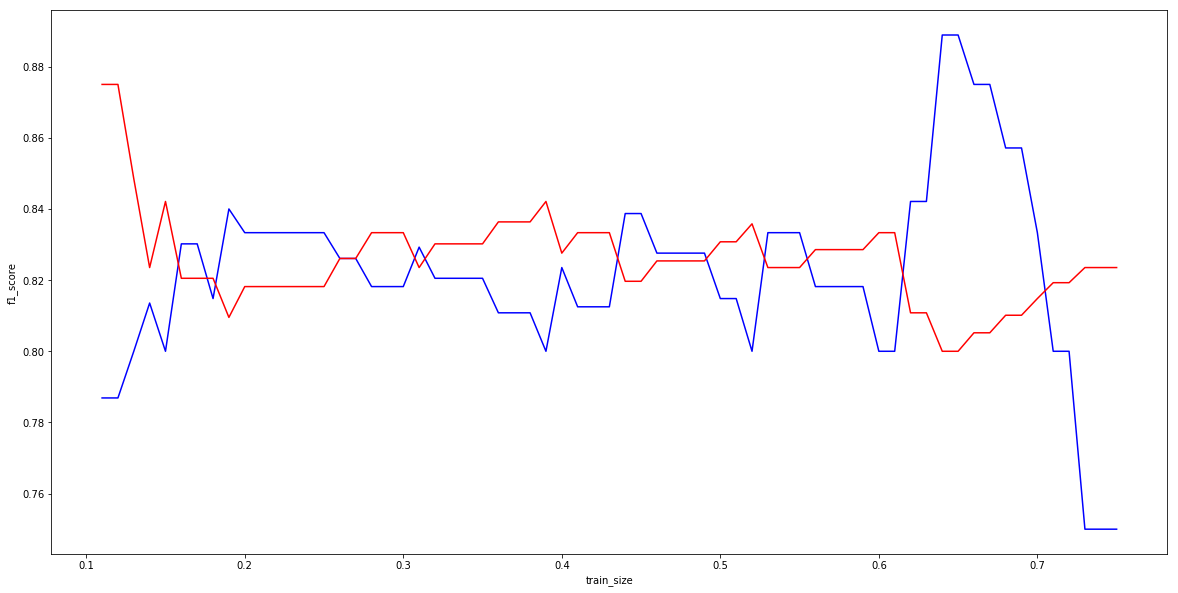

In [6]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

plt.plot(numpy.arange(0.75,0.1,-0.01),f1_score_list,'b',numpy.arange(0.75,0.1,-0.01),f1_score_list_train,'r')
plt.ylabel('f1_score')
plt.xlabel('train_size')
plt.show()